## Prima parte
Implementare la DCT2 come spiegata a lezione in un ambiente open source a vostra scelta e confrontare i tempi di esecuzione con la DCT2 ottenuta usando la libreria dell’ambiente
utilizzato, che si presuppone essere nella versione fast (FFT). In particolare, procurarsi array quadrati N×N con N crescente e rappresentare su un grafico in scala semilogaritmica (le ascisse saranno le pure quantità scalari mentre le ordinate il logaritmo) al variare di N il tempo impiegato ad eseguire la DCT2 col vostro algoritmo fatto in casa e con l’algoritmo della libreria. I tempi dovrebbero essere proporzionali a N<sup>3</sup> per la DCT2 fatta in casa e a N<sup>2</sup> per la versione fast (più precisamente a N<sup>2</sup> log(N)). I tempi ottenuti con la versione

In [16]:
import numpy as np
import time
import matplotlib.pyplot as plt
from functions.dct2 import dct2_home_made
from scipy.fft import dctn

In [17]:
# FFT-2 transform using library
def fft2_scipy(x):
    X = dctn(x, norm='ortho')
    return X


# Function to measure execution time
def measure_time(func, x):
    start_time = time.time()
    func(x)
    end_time = time.time() - start_time
    return end_time

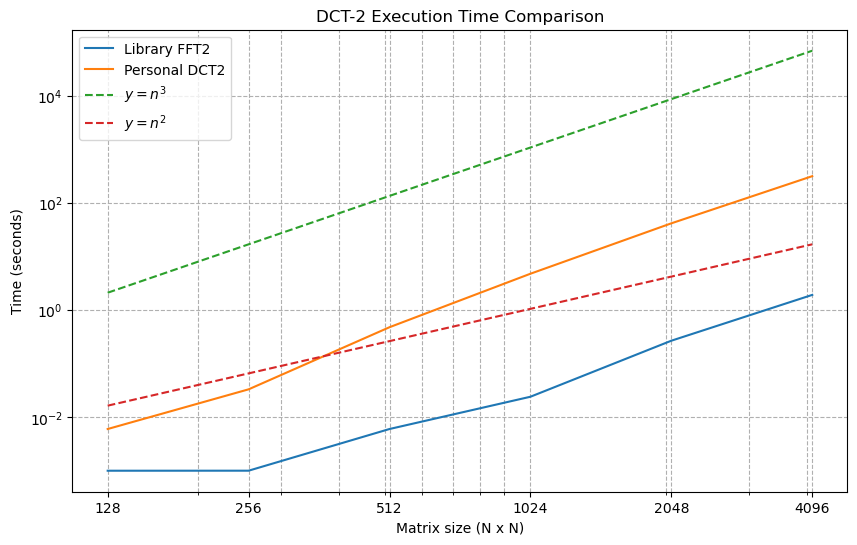

In [18]:
# Sizes of matrices
sizes = np.array([64, 128, 256, 512, 1024, 2048, 4096], dtype=np.int64)

# Lists to store execution times
times_fft2 = []
times_dct2_home_made = []

for size in sizes:
    x = np.random.uniform(low=0.0, high=255.0, size=(size, size))
    
    # Measure time for home-made DCT2
    time_dct2_home_made = measure_time(dct2_home_made, x)
    times_dct2_home_made.append(time_dct2_home_made)

    time_fft2 = measure_time(fft2_scipy, x)
    times_fft2.append(time_fft2)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(sizes, times_fft2, label='Library FFT2')
plt.plot(sizes, times_dct2_home_made, label='Personal DCT2')
plt.plot(sizes, (10**-6)* np.power(sizes, 3, dtype=np.int64), label=r'$y = n^3$', linestyle='--')
plt.plot(sizes, (10**-6)* np.power(sizes, 2, dtype=np.int64), label=r'$y = n^2$', linestyle='--')
plt.xscale('log')
plt.yscale('log')

plt.xticks(sizes, sizes)

plt.xlabel('Matrix size (N)')
plt.ylabel('Time (seconds)')
plt.title('DCT-2 Execution Time Comparison')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

In [19]:
# # Test matrix
# array = np.array([
#     [231, 32, 233, 161, 24, 71, 140, 245],
#     [247, 40, 248, 245, 124, 204, 36, 107],
#     [234, 202, 245, 167, 9, 217, 239, 173],
#     [193, 190, 100, 167, 43, 180, 8, 70],
#     [11, 24, 210, 177, 81, 243, 8, 112],
#     [97, 195, 203, 47, 125, 114, 165, 181],
#     [193, 70, 174, 167, 41, 30, 127, 245],
#     [87, 149, 57, 192, 65, 129, 178, 228]
# ])
# print(dct2_home_made(array))
# print("*****")
# print(fft2_scipy(array))

In [20]:
array = np.random.rand(200, 200)
print(dct2_home_made(array))
print(fft2_scipy(array))

[[ 3.32848837e-01  1.42215118e+02  1.42201959e+02 ...  3.35065807e+00
   2.23388688e+00  1.11697789e+00]
 [ 5.80520958e-01  8.20752733e-01  2.00624496e+02 ... -1.41852509e+01
  -9.46121105e+00 -4.73191896e+00]
 [ 8.18550597e-01  1.15671288e+00  1.15403685e+00 ...  4.59038237e+01
   3.06419282e+01  1.53327851e+01]
 ...
 [ 5.15469967e-01 -7.28422597e-01  7.26737402e-01 ... -8.56829548e-02
  -3.33047428e+31  1.66652197e+31]
 [ 6.41866285e-01 -9.07484046e-01  9.06728306e-01 ...  6.41106581e-02
  -4.27602214e-02  7.41998737e+30]
 [ 6.08205564e-01 -8.60106029e-01  8.60026445e-01 ... -2.02645208e-02
   1.35103750e-02 -6.75539586e-03]]
[[ 1.00007751e+02  1.36598359e-01  3.24100810e-01 ... -5.24898807e-01
   5.47342311e-02  1.24497760e-02]
 [-3.00725584e-02 -5.70659900e-01  6.00085668e-02 ... -4.05355285e-01
   5.37076069e-01 -1.30932434e-01]
 [ 9.22597346e-02  9.95148387e-03  2.38451286e-02 ...  2.87685842e-01
   8.74606356e-02  7.05662999e-01]
 ...
 [-1.73398057e-01 -2.83860282e-01 -1.7026189